In [3]:
# 표 질의응답 데이터 json 파싱

import json

def parse_json_file(file_path):
    # JSON 파일을 UTF-8로 인코딩하여 열고 데이터를 로드합니다.
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # 파싱된 데이터를 저장할 리스트 초기화
    parsed_data = []

    # 데이터의 'data' 필드 내의 각 문서에 대한 반복 처리
    for doc in data['data']:
        doc_title = doc['doc_title']  # 문서 제목 추출

        # 'paragraphs' 배열 내의 각 문단에 대한 반복 처리
        for paragraph in doc['paragraphs']:
            context = paragraph['context']  # 문단 내용 추출

            # 'qas' 배열 내의 각 QA 세트에 대한 반복 처리
            for qa in paragraph['qas']:
                question = qa['question']  # 질문 추출
                answer_text = qa['answer']['text']  # 답변 텍스트 추출

                # 최종 파싱된 데이터 구조
                parsed_item = {
                    'doc_title': doc_title,
                    'context': context,
                    'question': question,
                    'text': answer_text
                }
                parsed_data.append(parsed_item)

    return parsed_data

def save_data_to_txt(parsed_data, output_file):
    # 결과 데이터를 텍스트 파일로 저장합니다.
    with open(output_file, 'w', encoding='utf-8') as file:
        for item in parsed_data:
            file.write(f"Document Title: {item['doc_title']}\n")
            file.write(f"Context: {item['context']}\n")
            file.write(f"Question: {item['question']}\n")
            file.write(f"Answer: {item['text']}\n")
            file.write("\n")  # 각 항목 사이에 공백 줄 추가

# 함수 사용 예시
file_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\표질의응답 데이터\\2.Validation_[TQA] 표 정보 질의응답_output_라벨링데이터_2023052317.json"  # 실제 JSON 파일 경로로 변경 필요
output_file = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\표질의응답 데이터\\표질의응답파싱데이터.txt"  # 출력 파일 경로

parsed_data = parse_json_file(file_path)
save_data_to_txt(parsed_data, output_file)


In [4]:
# 파싱 데이터 csv 변환

import csv

def txt_to_csv(input_txt_path, output_csv_path):
    with open(input_txt_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # 데이터를 저장할 리스트
    data = []
    record = {}
    
    # 텍스트 파일을 줄 단위로 읽어 처리
    for line in lines:
        if line.strip() == "":  # 빈 줄에서 새로운 레코드 시작
            if record:
                data.append(record)
                record = {}
            continue
        
        # 줄의 내용 파싱
        key, value = line.split(":", 1)
        key = key.strip()
        value = value.strip().replace("\n", "")
        if key in ['Document Title', 'Context', 'Question', 'Answer']:
            record[key] = value

    # 마지막 레코드 추가
    if record:
        data.append(record)

    # CSV 파일로 저장
    with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['id', 'Document Title', 'Context', 'Question', 'Answer']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for idx, rec in enumerate(data):
            rec['id'] = idx
            writer.writerow(rec)

# 사용 예시
input_txt_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\프로젝트\\데이터\\표 정보 질의의답 데이터\\표질의응답파싱데이터.txt"  # 입력 텍스트 파일 경로
output_csv_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\프로젝트\\데이터\\표 정보 질의의답 데이터\\표질의응답csv.csv"  # 출력 CSV 파일 경로

txt_to_csv(input_txt_path, output_csv_path)


In [5]:
# 데이터 2 json 파싱 및 txt 변환

import json

def parse_json_and_save_to_txt(file_path, output_txt_path):
    # JSON 파일을 UTF-8로 인코딩하여 열고 데이터를 로드합니다.
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # 텍스트 파일에 저장할 준비
    with open(output_txt_path, 'w', encoding='utf-8') as txt_file:
        # 'data' 배열 내의 각 항목에 대한 반복 처리
        for entry in data['data']:
            doc_title = entry['title']  # 문서 제목 추출

            # 'paragraphs' 배열 내의 각 문단에 대한 반복 처리
            for paragraph in entry['paragraphs']:
                context = paragraph['context']  # 문단 내용 추출

                # 'qas' 배열 내의 각 QA 세트에 대한 반복 처리
                for qa in paragraph['qas']:
                    question = qa['question']  # 질문 추출
                    # 답변 텍스트 추출 (첫 번째 답변만 사용)
                    answer_text = qa['answers'][0]['text']

                    # 파일에 쓰기
                    txt_file.write(f"Document Title: {doc_title}\n")
                    txt_file.write(f"Context: {context}\n")
                    txt_file.write(f"Question: {question}\n")
                    txt_file.write(f"Answer: {answer_text}\n\n")

# 함수 사용 예시
input_json_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터\\ko_wiki_v1_squad.json"  # JSON 파일 경로
output_txt_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터\\문맥기반질의응답파싱데이터.txt"  # 출력 텍스트 파일 경로

parse_json_and_save_to_txt(input_json_path, output_txt_path)



In [6]:
# 파싱 데이터 csv 변환

import csv

def txt_to_csv(input_txt_path, output_csv_path):
    with open(input_txt_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # 데이터를 저장할 리스트
    data = []
    record = {}
    
    # 텍스트 파일을 줄 단위로 읽어 처리
    for line in lines:
        if line.strip() == "":  # 빈 줄에서 새로운 레코드 시작
            if record:
                data.append(record)
                record = {}
            continue
        
        # 줄의 내용 파싱
        key, value = line.split(":", 1)
        key = key.strip()
        value = value.strip().replace("\n", "")
        if key in ['Document Title', 'Context', 'Question', 'Answer']:
            record[key] = value

    # 마지막 레코드 추가
    if record:
        data.append(record)

    # CSV 파일로 저장
    with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['id', 'Document Title', 'Context', 'Question', 'Answer']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for idx, rec in enumerate(data):
            rec['id'] = idx
            writer.writerow(rec)

# 사용 예시
input_txt_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터\\파싱데이터.txt"  # 입력 텍스트 파일 경로
output_csv_path = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터\\문맥기반질의응답csv.csv"  # 출력 CSV 파일 경로

txt_to_csv(input_txt_path, output_csv_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터\\파싱데이터.txt'

In [3]:
#필요 라이브러리 선언
import pandas as pd

In [1]:
#변수 설정
table_qa_csv = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\표질의응답 데이터\\표질의응답csv.csv"
context_qa_csv = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터\\문맥기반질의응답csv.csv"

In [8]:
# 판다스로 데이터 로드 (표질의응답)
table_qa_data = pd.read_csv(table_qa_csv, encoding='cp949')
table_qa_data = table_qa_data[:5000]
# 훈련셋의 앞부분 출력
table_qa_data.head(10)

,id,Document Title,Context,Question,Answer
0,0,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력평가서 제출안내,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력 세부평가기...,성안동 일원 분류식화 하수관로 정비사업의 용역업자 사업수행능력 평가 시 참여기술인 ...,50
1,1,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력평가서 제출안내,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력 세부평가기...,성안동 일원 분류식화 하수관로 정비사업의 용역업자 사업수행능력 평가 시 신용도에 대...,10
2,2,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력평가서 제출안내,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력 세부평가기...,유사용역 수행실적 항목의 평가방법은 어떻게 되는가,·건수 : 6점<br>·금액 : 6점<br>·전차용역 : 1점<br>·용역수행성과 ...
3,3,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력평가서 제출안내,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력 세부평가기...,기술개발 및 투자실적 항목의 평가방법은 어떻게 돼,·개발실적 : 2점<br>·투자실적 : 10점<br>·활용실적 : 3점
4,4,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력평가서 제출안내,성안동 일원 분류식화 하수관로 정비사업 기본 및 실시설계용역 사업수행능력 세부평가기...,유사용역 업무중복도에 대한 평가 배점은 얼마야,10
5,5,후포어선안전조업국 통신시설 이설공사(재공고),후포어선안전조업국 통신시설 이설사업 제안요청서<br>사업명: 후포어선안전조업국 통신...,실적에서 총금액이 10억 이상인 사업을 수행했다고 평가되면 몇 점을 받을 수 있어,10
6,6,후포어선안전조업국 통신시설 이설공사(재공고),후포어선안전조업국 통신시설 이설사업 제안요청서<br>사업명: 후포어선안전조업국 통신...,유사사업 수행실적 총금액이 9억 이상일 때 배점은 몇 점일까,8
7,7,후포어선안전조업국 통신시설 이설공사(재공고),후포어선안전조업국 통신시설 이설사업 제안요청서<br>사업명: 후포어선안전조업국 통신...,배점 4점을 받으면 유사용역범위 중 어떤 요소를 평가한 거니,유사사업 수행실적 총금액 5억이상
8,8,후포어선안전조업국 통신시설 이설공사(재공고),후포어선안전조업국 통신시설 이설사업 제안요청서<br>사업명: 후포어선안전조업국 통신...,통신시설 이설과 유사한 사업에서 3억이상의 총금액을 썼을 때 평가배점은 몇 점이니,2
9,9,후포어선안전조업국 통신시설 이설공사(재공고),후포어선안전조업국 통신시설 이설사업 제안요청서<br>사업명: 후포어선안전조업국 통신...,통신 범위 평가에 따른 실적 총금액이 7억 미만일 때 배점은 몇 점이니,1


In [9]:
# 판다스로 데이터 로드 (문맥 질의응답)
context_qa_data = pd.read_csv(context_qa_csv, encoding='cp949')
context_qa_data = context_qa_data[:5000]
# 훈련셋의 앞부분 출력
context_qa_data.head(10)

,id,Document Title,Context,Question,Answer
0,0,다테_기미코,"재팬 오픈에서 4회 우승하였으며, 통산 단식 200승 이상을 거두었다. 1994년 ...",다테 기미코가 최초로 은퇴 선언을 한게 언제지,1996년 9월 24일
1,1,Ave;new,"ave;new(아베;뉴, アベニュ?)는 도쿄 치요다구에 본 거처를 둔 일본의 음악 ...",ave;new 본거지 어디야,도쿄 치요다구
2,2,사카이_다다요시_(1714년),"사카이 다다요시(일본어: 酒井忠休, 1714년 9월 24일 ~ 1787년 6월 3일...",사카이 다다요시의 아버지가 누구지,사카이 나오타카(酒井直隆)
3,3,일반성면,"일반성면은 동부 5개 면의 교통, 문화, 교육, 상업의 중심지로서 일찍부터 상업이 ...",일반성면의 면적이 얼마야,19.41 km²
4,4,금나라,"지방은 전국을 19개 로(路)로 나누고, 그 아래에 부(府)나 주(州)를 두고, 다...",금나라를 세운 사람이 누구야,태조 아구다
5,5,미식축구,"한 번의 공격플레이는 수비팀이 공을 가진 선수를 태클하여 땅에 넘어뜨리면 끝나고, ...",스냅이 뭐야,오펜스 라인의 가운데 있는 센터가 스크리미지 라인 위에 놓여있는 공을 뒤에 있는 쿼...
6,6,포클랜드 제도,유럽연합 국가임에도 불구하고 스페인은 아르헨티나의 영유권주장을 암묵적으로 인정하고 ...,포클랜드제도에 대한 UN의 입장은 뭐야,중립적 관점에 의거하여 영국과 아르헨티나 양측이 이 문제에 대해 협상을 시작할 것을 요구
7,7,조선민주주의인민공화국의_잠수함,"북한은 1960년대 후반에 소련으로부터 잠수함을 제공받았으며, 1990년대에는 러시...",2014년 지금 북한이 잠수함을 몇개 가졌다고 알려져 있어,78척
8,8,김병지,"1990 상무(상주 상무) 입단테스트에 합격해 2년 군생활 뒤, 1992년 울산 현...",김병지가 언제 데뷔했어,1992년
9,9,Prism (케이티 페리의 음반),두 장의 싱글이 발매되는 사이 프로모션 싱글 〈Dark Horse(Dark Hors...,케이티 페리의 직업은 뭐야,미국의 싱어송라이터


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#모델 데이터 입력 및 예측 답변 츨력, 성능 지표 Accuracy, precision, recall, F1 score 

from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델과 토크나이저 불러오기
model_name = 'arogyaGurkha/koelectra-base-discriminator-finetuned-squad_kor_v1'
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def get_answer_from_model(context, question):
    """ 모델을 사용하여 질문에 대한 답변을 추출 """
    inputs = tokenizer.encode_plus(
        question,
        context,
        add_special_tokens=True,
        max_length=512,  # 최대 길이 설정
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    input_ids = inputs["input_ids"].tolist()[0]

    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    return answer

def process_data(df):
    """ 데이터 처리 및 모델을 사용한 답변 추출 """
    # 모델을 사용하여 각 질문에 대한 답변 추출
    df['Predicted Answer'] = df.apply(lambda row: get_answer_from_model(row['Context'], row['Question']), axis=1)
    return df

def evaluate_model(df):
    """ 모델 성능 평가 """
    true_answers = df['Answer'].tolist()
    pred_answers = df['Predicted Answer'].tolist()

    # 정확도, 정밀도, 재현율, F1 스코어 계산
    accuracy = accuracy_score(true_answers, pred_answers)
    precision = precision_score(true_answers, pred_answers, average='weighted', zero_division=0)
    recall = recall_score(true_answers, pred_answers, average='weighted', zero_division=0)
    f1 = f1_score(true_answers, pred_answers, average='weighted', zero_division=0)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# 표 기반 질의응답 데이터 처리
table_qa_results = process_data(table_qa_data)
print(table_qa_results[['Question', 'Answer', 'Predicted Answer']].head())
evaluate_model(table_qa_results)

# 문맥 기반 질의응답 데이터 처리
context_qa_results = process_data(context_qa_data)
print(context_qa_results[['Question', 'Answer', 'Predicted Answer']].head())
evaluate_model(context_qa_results)


                                            Question  \
0  성안동 일원 분류식화 하수관로 정비사업의 용역업자 사업수행능력 평가 시 참여기술인 ...   
1  성안동 일원 분류식화 하수관로 정비사업의 용역업자 사업수행능력 평가 시 신용도에 대...   
2                        유사용역 수행실적 항목의 평가방법은 어떻게 되는가   
3                        기술개발 및 투자실적 항목의 평가방법은 어떻게 돼   
4                          유사용역 업무중복도에 대한 평가 배점은 얼마야   

                                              Answer  \
0                                                 50   
1                                                 10   
2  ·건수 : 6점<br>·금액 : 6점<br>·전차용역 : 1점<br>·용역수행성과 ...   
3            ·개발실적 : 2점<br>·투자실적 : 10점<br>·활용실적 : 3점   
4                                                 10   

                                    Predicted Answer  
0                                              [CLS]  
1                                              [SEP]  
2                                              [CLS]  
3                                                     
4  [CLS] 유사용역 업무중복도에 대한 평가 배점은 얼마야 [SEP] 성안동 일원 분..

In [ ]:
import os

# 결과 데이터를 HTML 파일로 저장하는 함수
def save_results_to_html(df, file_name, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    file_path = os.path.join(directory, file_name)
    df.to_html(file_path, index=False, encoding='utf-8')

# 예시 저장 경로
table_save_directory = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\표질의응답 데이터"  # 원하는 경로로 변경하세요
context_save_directory = "C:\\Users\\kang8\\OneDrive\\바탕 화면\\실용언어 프로젝트\\문맥기반 질의응답 데이터"

# 표 기반 질의응답 결과 저장
save_results_to_html(table_qa_results, 'table_qa_results.html', table_save_directory)

# 문맥 기반 질의응답 결과 저장
save_results_to_html(context_qa_results, 'context_qa_results.html', context_save_directory)



In [11]:
#성능지표 시각화 라이브러리 설치

!pip install matplotlib seaborn scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Table QA Results Performance Metrics
Accuracy: 0.0218
Precision: 0.0543
Recall: 0.0218
F1 Score: 0.0243


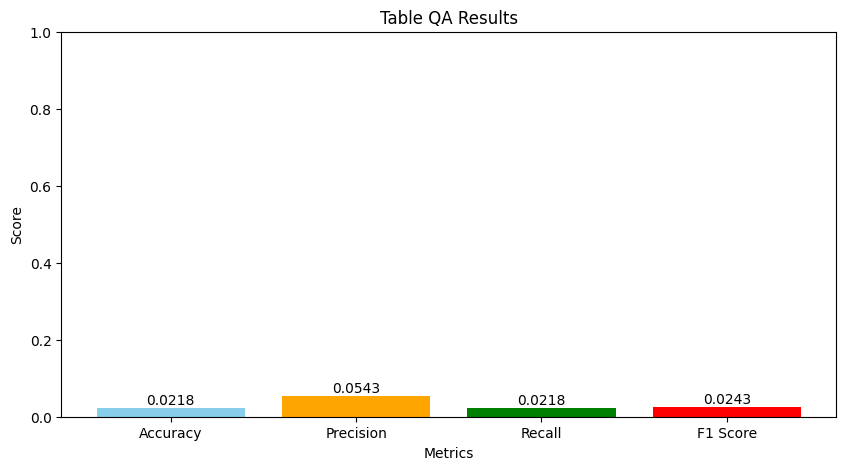

Context QA Results Performance Metrics
Accuracy: 0.4216
Precision: 0.4465
Recall: 0.4216
F1 Score: 0.4264


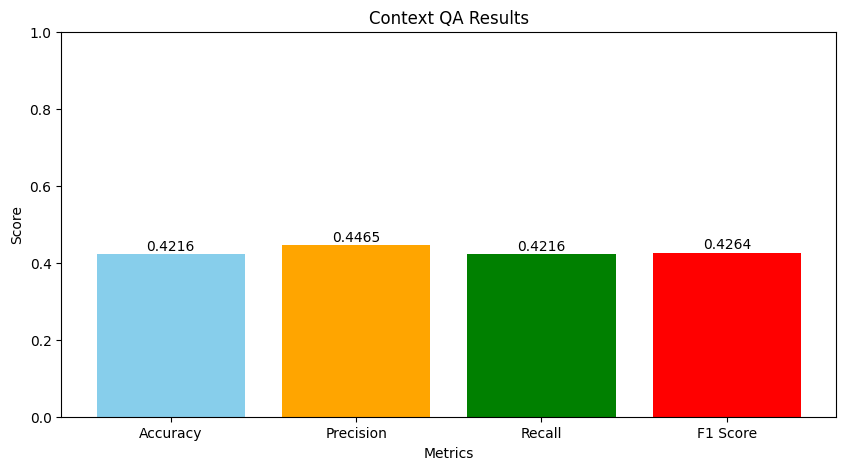

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 성능 지표 시각화 함수
def plot_metrics(accuracy, precision, recall, f1, title):
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    names = list(metrics.keys())
    values = list(metrics.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values, color=['skyblue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel('Score')
    plt.xlabel('Metrics')
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f"{value:.4f}", ha='center')
    plt.show()

# 성능 지표 계산 및 시각화 함수
def evaluate_and_plot_metrics(df, title):
    true_answers = df['Answer'].tolist()
    pred_answers = df['Predicted Answer'].tolist()

    # 성능 지표 계산
    accuracy = accuracy_score(true_answers, pred_answers)
    precision = precision_score(true_answers, pred_answers, average='weighted', zero_division=0)
    recall = recall_score(true_answers, pred_answers, average='weighted', zero_division=0)
    f1 = f1_score(true_answers, pred_answers, average='weighted', zero_division=0)

    print(f"{title} Performance Metrics")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # 성능 지표 시각화
    plot_metrics(accuracy, precision, recall, f1, title)

# 표 기반 질의응답 데이터 성능 지표 시각화
evaluate_and_plot_metrics(table_qa_results, 'Table QA Results')

# 문맥 기반 질의응답 데이터 성능 지표 시각화
evaluate_and_plot_metrics(context_qa_results, 'Context QA Results')


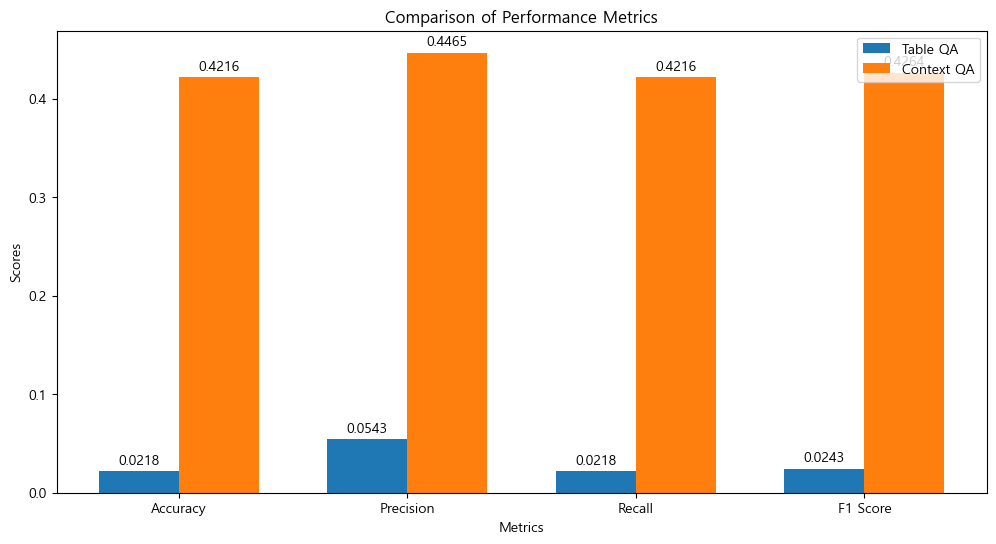

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 성능 지표 바 차트 시각화 함수
def plot_comparison_metrics(metrics_dict, title):
    categories = list(metrics_dict.keys())
    values_table = [metrics_dict[cat]['table'] for cat in categories]
    values_context = [metrics_dict[cat]['context'] for cat in categories]
    
    x = np.arange(len(categories))  # 라벨 위치
    width = 0.35  # 바의 너비
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, values_table, width, label='Table QA')
    bars2 = ax.bar(x + width/2, values_context, width, label='Context QA')
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    
    # 바 위에 점수 표시
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
    plt.show()

# 성능 지표 계산 함수
def calculate_metrics(df, name):
    true_answers = df['Answer'].tolist()
    pred_answers = df['Predicted Answer'].tolist()

    # 성능 지표 계산
    accuracy = accuracy_score(true_answers, pred_answers)
    precision = precision_score(true_answers, pred_answers, average='weighted', zero_division=0)
    recall = recall_score(true_answers, pred_answers, average='weighted', zero_division=0)
    f1 = f1_score(true_answers, pred_answers, average='weighted', zero_division=0)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# 표 기반 질의응답 데이터 성능 지표 계산
metrics_table = calculate_metrics(table_qa_results, 'Table QA')

# 문맥 기반 질의응답 데이터 성능 지표 계산
metrics_context = calculate_metrics(context_qa_results, 'Context QA')

# 성능 지표 비교
metrics_dict = {
    'Accuracy': {'table': metrics_table['accuracy'], 'context': metrics_context['accuracy']},
    'Precision': {'table': metrics_table['precision'], 'context': metrics_context['precision']},
    'Recall': {'table': metrics_table['recall'], 'context': metrics_context['recall']},
    'F1 Score': {'table': metrics_table['f1'], 'context': metrics_context['f1']}
}

# 성능 지표 바 차트 시각화
plot_comparison_metrics(metrics_dict, 'Comparison of Performance Metrics')